### Exploring the Data
* Import necessary libraries
* Find patterns/missing variables in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
#https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min/download
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
df.shape

(9879, 40)

In [4]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [5]:
#every feature is numerical, like expected
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

In [6]:
#no missing values
df.isna().sum();

### Visualizing some Features

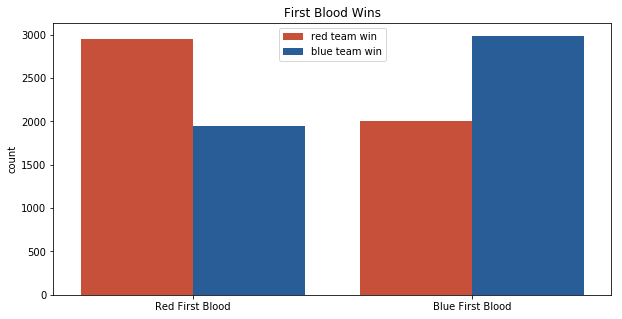

In [7]:
#get values where blue got first blood
plt.figure(figsize = (10,5))
ax = sns.countplot(df['blueFirstBlood'], hue = df['blueWins'], palette= ['#DE3F24','#165CAA'])
ax.legend(['red team win','blue team win']);
ax.set_xlabel(xlabel=None)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Red First Blood'
labels[1] = 'Blue First Blood'
ax.set_xticklabels(labels)
ax.set_title('First Blood Wins');

There seems to be inaccurate data on the amount of wards placed
* It is impossible to place more than 200 wards yet, even 100 wards in a 10 minute game
* The wards placed counts, champion skills such as shaco boxes and nidalee's traps

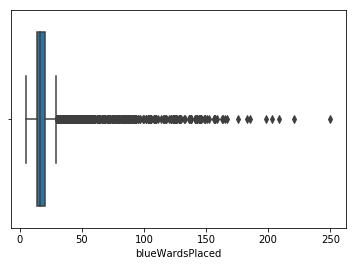

In [8]:
sns.boxplot(df['blueWardsPlaced'])

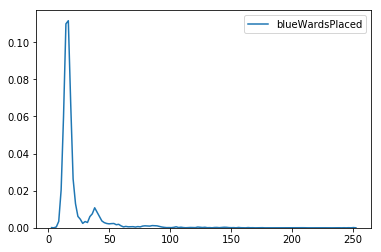

In [9]:
sns.kdeplot(df['blueWardsPlaced'])

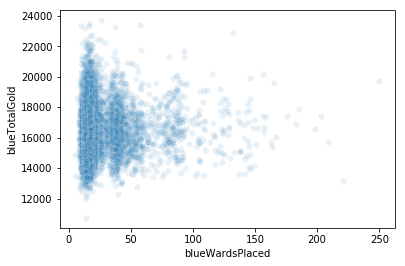

In [10]:
sns.scatterplot(x= df['blueWardsPlaced'],y= df['blueTotalGold'],alpha =.1)

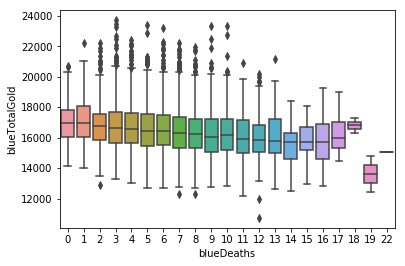

In [11]:
sns.boxplot(x= df['blueDeaths'],y= df['blueTotalGold'])

Text(0.5, 1.0, 'Percentage of blue wins by Monsters killed (10min)')

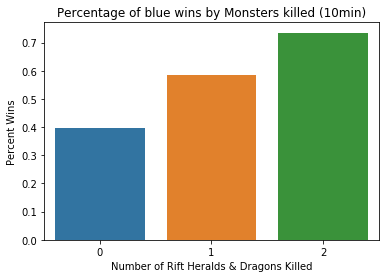

In [12]:
btotalMonsters_wins =df.groupby('blueEliteMonsters').mean()['blueWins']
ax = sns.barplot(x = btotalMonsters_wins.index ,y = btotalMonsters_wins.values);
ax.set_ylabel('Percent Wins')
ax.set_xlabel('Number of Rift Heralds & Dragons Killed')
ax.set_title('Percentage of blue wins by Monsters killed (10min)')

In [13]:
df.groupby('blueWins').mean()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.500057e+09,22.286725,2.728834,0.404122,5.170135,7.131138,5.522732,0.411396,0.259446,0.151950,0.023237,15864.111134,6.807032,17453.47161,211.793090,49.211154,-1237.066680,-971.898969,21.179309,1586.411113,22.804001,2.841382,0.595878,7.131138,5.170135,7.760558,0.711659,0.516064,0.195595,0.065468,17101.177814,7.032613,18425.370580,221.989089,52.423924,1237.066680,971.898969,22.198909,1710.117781
1,4.500111e+09,22.289858,2.921298,0.605882,7.201623,5.140365,7.771805,0.689047,0.464909,0.224138,0.079716,17145.263895,7.025396,18404.57789,221.624949,51.813185,1270.718053,908.274442,22.162495,1714.526389,21.930223,2.604462,0.394118,5.140365,7.201623,5.559432,0.434077,0.309736,0.124341,0.020487,15874.545842,6.817606,17496.303448,212.691481,50.197972,-1270.718053,-908.274442,21.269148,1587.454584


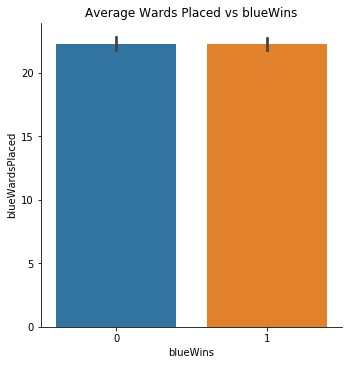

In [14]:
sns.catplot(x= 'blueWins', y= 'blueWardsPlaced', data = df,kind = 'bar');
plt.title('Average Wards Placed vs blueWins');

In [15]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

## Feature Engineering
* Create KDA ratio columns
* Create comparison columns

#### Create kda ratio column
* kills + assists(.5) / deaths  
  *Since deaths can be ZERO, divide by 1 if deaths == 0.*

In [3]:
def KDR(kills,assists,deaths,new_col):
    df[new_col] = np.where(df[deaths]== 0,  (df[kills]+df[assists]*.5)/1,(df[kills]+df[assists]*.5)/df[deaths])
    return df[new_col]

In [4]:
KDR('redKills','redAssists','redDeaths','redKDR');
KDR('blueKills','blueAssists','blueDeaths','blueKDR');

In [5]:
#check blueKDR
df['blueKDR'].head()

0    2.416667
1    1.500000
2    0.818182
3    1.300000
4    1.500000
Name: blueKDR, dtype: float64

#### Create diff. columns, subtract respective blue & red columns
* bluecols - redcols

In [6]:
blue_cols = [col for col in df.columns if col.startswith('blue')]
red_cols = [col for col in df.columns if col.startswith('red')]

In [7]:
#there is no red wins so drop blue wins
blue_cols.remove('blueWins')

In [8]:
#make sure lenth of cols are equal length
print(len(blue_cols))
print(len(red_cols))

20
20


In [9]:
zipped = zip(blue_cols, red_cols)

In [10]:
def comparison_columns(zipped):
        for blue,red in zipped:
            new_col = 'diff' + blue
            df[new_col] = df[blue] - df[red]

In [11]:
comparison_columns(zipped)

#### Create a function to compare Red and Blue teams by their values
* If blue == red then equal
* If blue > red then greater
* if blue < red then less

In [12]:
def comparing_teams(blue,red,colname):
    conditions = [df[blue] == df[red], df[blue] >df[red]]
    choices = ['equal','greater']
    df[colname] = np.select(conditions,choices,default = 'less')

Three columns created: 
* bluevredEliteMonsters
* bluevredTowersDestroyed
* bluevredWardsPlaced


In [13]:
comparing_teams('blueEliteMonsters','redEliteMonsters','bluevredEliteMonsters')

In [14]:
comparing_teams('blueTowersDestroyed','redTowersDestroyed','bluevredTowersDestroyed')

In [15]:
comparing_teams('blueWardsPlaced','redWardsPlaced','bluevredWardsPlaced')

In [18]:
%cd

C:\Users\jshyo


In [78]:
'''lol_cleaned_df =  \
df.to_csv("C:/Users/jshyo/desktop/projects/league-of-legends-diamond-ranked-games-10-min/lol_cleaned_df.csv")'''

### Correlation Matrix
* Remove highly correlated variables

In [15]:
correlation = df.corr()

Wall time: 378 ms


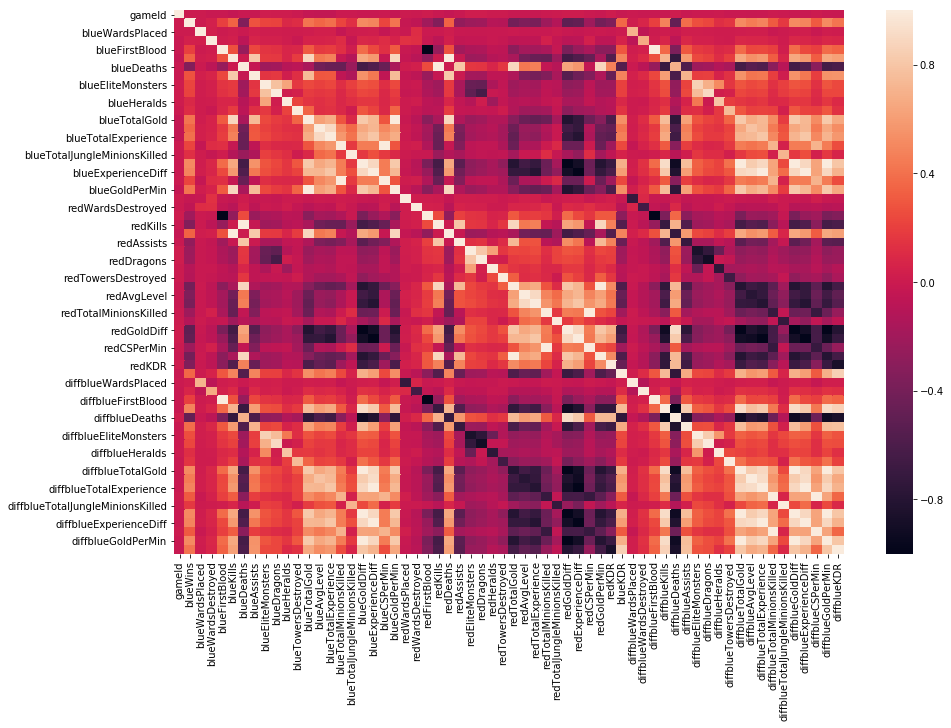

In [16]:
%%time
plt.figure(figsize = (15,10))
sns.heatmap(correlation)

In [22]:
diff_columns = [col for col in df if col.startswith('d')]

In [24]:
diff_corr = df[diff_columns].corr()

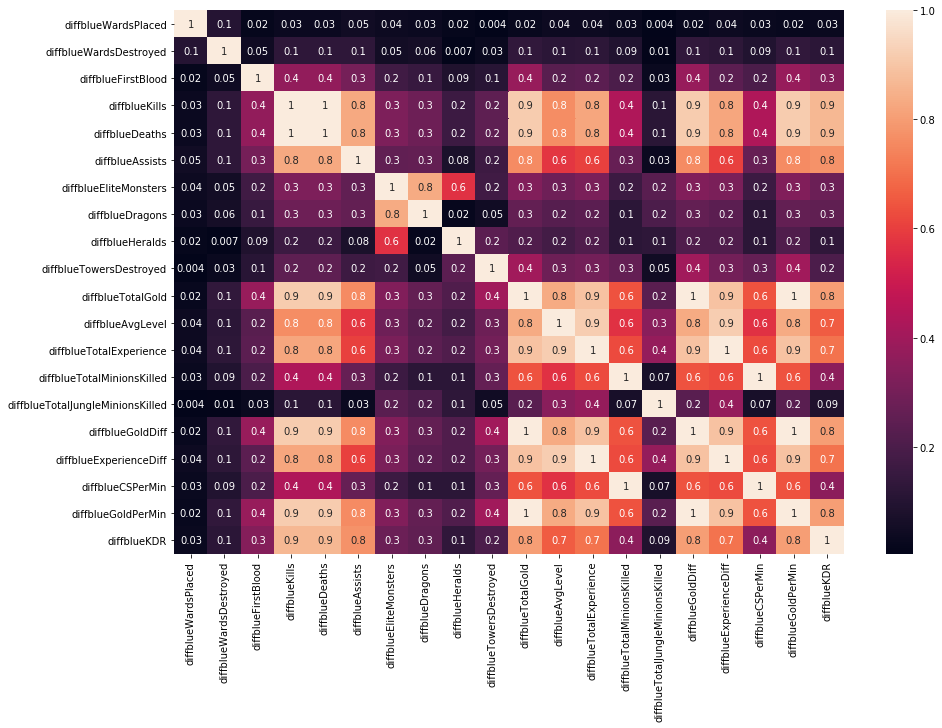

In [29]:
plt.figure(figsize = (15,10))
sns.heatmap(diff_corr.abs(),annot= True,fmt= '.1g')

* KDR is highly correlated with kills, deaths, assists, which make sense because KDR is made up of these three variables.
* KDR is also highly correlated with gold, level, and experience
* Elite Monsters is correlated with dragon and heralds killed because Elite Monsters = dragons + heralds
* CS per minute is correlated with total minions killed, because total minions killed/ 10 is CS per min.  


*We will keep diffblueKDR, diffblueEliteMonsters, ,diffblueTowersDestroyed, diffblueTotalJungleMinionsKilled, diffblueTotalMinionsKilled,'blueFirstBlood','diffblueWardsDestroyed',diffblueWardsPlaced'*

### Building a Model
* Logistic Regression model
* Get the model parameters to see importance of variables in the features

In [30]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redKDR',
       'blueKDR', 'diffblueWardsPlaced', 'diffblueWardsDestroyed',
       'diffblueFirstBlood', 'diffblueKills', 'diffblueDeaths',
       'diffblueAssists', 'diffblueEliteMonsters',

In [16]:
features = ['diffblueKDR','diffblueEliteMonsters','diffblueTowersDestroyed','diffblueTotalJungleMinionsKilled',\
           'diffblueTotalMinionsKilled','diffblueWardsPlaced','diffblueWardsDestroyed','blueFirstBlood']
response = 'blueWins'

In [17]:
X = df[features].copy()
y = df[response].copy()

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 8 columns):
diffblueKDR                         9879 non-null float64
diffblueEliteMonsters               9879 non-null int64
diffblueTowersDestroyed             9879 non-null int64
diffblueTotalJungleMinionsKilled    9879 non-null int64
diffblueTotalMinionsKilled          9879 non-null int64
diffblueWardsPlaced                 9879 non-null int64
diffblueWardsDestroyed              9879 non-null int64
blueFirstBlood                      9879 non-null int64
dtypes: float64(1), int64(7)
memory usage: 617.5 KB


In [19]:
from sklearn.preprocessing import StandardScaler
X_fitted = StandardScaler().fit_transform(X)

C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_fitted,y, test_size = .2, random_state = 101)

In [22]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
predictions = logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

In [26]:
print(tn, fp, fn, tp)

705 278 279 714


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       983
           1       0.72      0.72      0.72       993

   micro avg       0.72      0.72      0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



In [29]:
logmodel.score(X_test,y_test)

0.7181174089068826

In [30]:
logmodel.score(X_train,y_train)

0.7203593572061242

In [31]:
model_parameters = logmodel.coef_

In [32]:
#features= features of model named above
#zip together and sort the parameters inorder of importance
sorted(zip(model_parameters[0],features),reverse = True)

[(1.1566195589740964, 'diffblueKDR'),
 (0.4036063041602289, 'diffblueTotalMinionsKilled'),
 (0.2867365052669041, 'diffblueTotalJungleMinionsKilled'),
 (0.2395791703200776, 'diffblueEliteMonsters'),
 (0.09918006918896262, 'diffblueTowersDestroyed'),
 (0.05649785770786307, 'blueFirstBlood'),
 (0.024177713647850103, 'diffblueWardsDestroyed'),
 (0.013998168914714799, 'diffblueWardsPlaced')]

In [33]:
odds_ratio = np.exp(model_parameters)

In [37]:
sorted(zip(odds_ratio[0],features),reverse= True)

[(3.179168100571716, 'diffblueKDR'),
 (1.4972143838373178, 'diffblueTotalMinionsKilled'),
 (1.3320731729638695, 'diffblueTotalJungleMinionsKilled'),
 (1.2707142835001835, 'diffblueEliteMonsters'),
 (1.1042651257827056, 'diffblueTowersDestroyed'),
 (1.0581243479863274, 'blueFirstBlood'),
 (1.02447236443507, 'diffblueWardsDestroyed'),
 (1.0140966020394264, 'diffblueWardsPlaced')]

In [36]:
np.exp(logmodel.intercept_)

array([0.98683161])